<div class="alert alert-block alert-success">
<b> Comentário do Tutor: </b> <a class="tocSkip"></a>
    
- correções feitas!
</div>

# Projeto de Teste A/B

**Importação de Bibliotecas**


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime

**Carregamento e Exploração dos Dados**

In [45]:

# Carregar os arquivos de participantes
participants_df = pd.read_csv('C:/Users/natan/Desktop/Tripleten/Projeto de Teste AB/final_ab_participants_upd_us.csv')
events_df = pd.read_csv('C:/Users/natan/Desktop/Tripleten/Projeto de Teste AB/ab_project_marketing_events_us.csv')
new_users_df = pd.read_csv('C:/Users/natan/Desktop/Tripleten/Projeto de Teste AB/final_ab_new_users_upd_us.csv')
events_log_df = pd.read_csv('C:/Users/natan/Desktop/Tripleten/Projeto de Teste AB/final_ab_events_upd_us.csv')

In [46]:
# Visualização inicial dos dados
print(events_df.head())
print(new_users_df.head())
print(events_log_df.head())
print(participants_df.head())


                           name                   regions    start_dt  \
0      Christmas&New Year Promo             EU, N.America  2020-12-25   
1  St. Valentine's Day Giveaway  EU, CIS, APAC, N.America  2020-02-14   
2        St. Patric's Day Promo             EU, N.America  2020-03-17   
3                  Easter Promo  EU, CIS, APAC, N.America  2020-04-12   
4             4th of July Promo                 N.America  2020-07-04   

    finish_dt  
0  2021-01-03  
1  2020-02-16  
2  2020-03-19  
3  2020-04-19  
4  2020-07-11  
            user_id  first_date     region   device
0  D72A72121175D8BE  2020-12-07         EU       PC
1  F1C668619DFE6E65  2020-12-07  N.America  Android
2  2E1BF1D4C37EA01F  2020-12-07         EU       PC
3  50734A22C0C63768  2020-12-07         EU   iPhone
4  E1BDDCE0DAFA2679  2020-12-07  N.America   iPhone
            user_id             event_dt event_name  details
0  E1BDDCE0DAFA2679  2020-12-07 20:22:03   purchase    99.99
1  7B6452F081F49504  2020-12-07

In [47]:
# Verificação dos tipos de dados e valores ausentes
print(events_df.info())
print(new_users_df.info())
print(events_log_df.info())
print(participants_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 580.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non

In [48]:
# Verificação de duplicatas
print(events_df.duplicated().sum())
print(new_users_df.duplicated().sum())
print(events_log_df.duplicated().sum())
print(participants_df.duplicated().sum())

0
0
0
0


In [49]:
# Pré-processamento e Limpeza dos Dados
# Conversão das colunas de datas para o formato datetime
new_users_df['first_date'] = pd.to_datetime(new_users_df['first_date'])
events_log_df['event_dt'] = pd.to_datetime(events_log_df['event_dt'])
events_df['start_dt'] = pd.to_datetime(events_df['start_dt'])
events_df['finish_dt'] = pd.to_datetime(events_df['finish_dt'])


# Exclusão de usuários que estão em ambos os grupos
final_df = pd.merge(new_users_df, participants_df, on='user_id')
final_df = final_df[~final_df.duplicated(subset=['user_id', 'group'])]

In [50]:
# Filtrar os usuários que participaram do teste 'recommender_system_test'
experiment_users = participants_df[participants_df['ab_test'] == 'recommender_system_test']

# Filtrar os eventos que ocorreram durante o período do experimento
experiment_events = events_log_df[
    (events_log_df['user_id'].isin(experiment_users['user_id'])) & 
    (events_log_df['event_dt'] >= datetime(2020, 12, 7)) & 
    (events_log_df['event_dt'] <= datetime(2021, 1, 1))
]

# Filtrar os eventos de marketing que ocorreram durante o período do experimento
relevant_marketing_events = events_df[
    (events_df['start_dt'] >= datetime(2020, 12, 7)) & 
    (events_df['finish_dt'] <= datetime(2021, 1, 1))
]

# Calcular o impacto dos eventos de marketing
event_counts = experiment_events['event_name'].value_counts()

# Número total de participantes
total_participants = len(experiment_users)

# Calcular os resultados reais em termos de proporção dos usuários que interagiram
actual_results = {
    'product_page': event_counts.get('product_page', 0) / total_participants,
    'product_cart': event_counts.get('product_cart', 0) / total_participants,
    'purchase': event_counts.get('purchase', 0) / total_participants
}

# Resultados esperados
expected_results = {'product_page': 0.12, 'product_cart': 0.11, 'purchase': 0.10}

# Exibir os resultados
print("Resultados esperados: ", expected_results)
print("Resultados reais: ", actual_results)

# Verificação da significância dos eventos de marketing
for event in actual_results:
    print(f"{event}: Real = {actual_results[event]:.4f}, Esperado = {expected_results[event]:.4f}")
    if actual_results[event] >= expected_results[event]:
        print(f"O evento {event} atingiu ou superou a expectativa.")
    else:
        print(f"O evento {event} não atingiu a expectativa.")


Resultados esperados:  {'product_page': 0.12, 'product_cart': 0.11, 'purchase': 0.1}
Resultados reais:  {'product_page': 1.8236734693877552, 'product_cart': 0.8598639455782313, 'purchase': 0.8734693877551021}
product_page: Real = 1.8237, Esperado = 0.1200
O evento product_page atingiu ou superou a expectativa.
product_cart: Real = 0.8599, Esperado = 0.1100
O evento product_cart atingiu ou superou a expectativa.
purchase: Real = 0.8735, Esperado = 0.1000
O evento purchase atingiu ou superou a expectativa.


In [51]:
tamanho_amostral_esperado = 6000
tamanho_amostra_executado = len(experiment_users)
print(f"Tamanho amostral executado/esperado: {tamanho_amostra_executado} / {tamanho_amostral_esperado}")
if tamanho_amostra_executado < tamanho_amostral_esperado:
    print("Tamanho amostral não chegou no tamanho necessário.")
else:
    print("Tamanho amostral não chegou no tamanho necessário.")
    

Tamanho amostral executado/esperado: 3675 / 6000
Tamanho amostral não chegou no tamanho necessário.


In [52]:
experimento_users_full = pd.merge(left = experiment_users, right = new_users_df, on = 'user_id')
data_primeiro_usuário = experimento_users_full['first_date'].min()
data_inicio_experimento = pd.to_datetime("12-07-2020")

print(f"Data de início executado/esperado: {data_primeiro_usuário} / {data_inicio_experimento}")
if data_primeiro_usuário != data_inicio_experimento:
    print("Data de ínicio não respeitada")
else:
    print("Data de início respeitada")

Data de início executado/esperado: 2020-12-07 00:00:00 / 2020-12-07 00:00:00
Data de início respeitada


In [53]:
data_ultimo_usuário = experimento_users_full['first_date'].max()
data_fim_experimento = pd.to_datetime("12-21-2020")  # Exemplo de data de fim esperada

print(f"Data de fim executado/esperado: {data_ultimo_usuário} / {data_fim_experimento}")
if data_ultimo_usuário != data_fim_experimento:
    print("Data de fim não respeitada")
else:
    print("Data de fim respeitada")


Data de fim executado/esperado: 2020-12-21 00:00:00 / 2020-12-21 00:00:00
Data de fim respeitada


In [54]:
print(experiment_users.columns)


Index(['user_id', 'group', 'ab_test'], dtype='object')


In [55]:
proporcao_ue_esperada = 0.5  # Exemplo de valor esperado
proporcao_ue_executada = (experiment_users['group'] == 'A').mean()

print(f"Proporção de usuários UE executada/esperada: {proporcao_ue_executada} / {proporcao_ue_esperada}")
if proporcao_ue_executada != proporcao_ue_esperada:
    print("Proporção de usuários UE não respeitada.")
else:
    print("Proporção de usuários UE respeitada.")


Proporção de usuários UE executada/esperada: 0.747482993197279 / 0.5
Proporção de usuários UE não respeitada.


In [56]:
print(participants_df['ab_test'].unique())


['recommender_system_test' 'interface_eu_test']


In [57]:
# Atualizar o nome do teste para 'interface_eu_test'
interface_eu_test_df = participants_df[participants_df['ab_test'] == 'interface_eu_test']
interface_eu_test_group_dist = interface_eu_test_df['group'].value_counts(normalize=True)

# Manter a distribuição de grupos para o experimento de recomendação
recommender_experiment_group_dist = final_df['group'].value_counts(normalize=True)

print("Distribuição de grupos no segundo experimento (interface_eu_test):")
print(interface_eu_test_group_dist)

print("\nDistribuição de grupos no experimento de recomendação:")
print(recommender_experiment_group_dist)


Distribuição de grupos no segundo experimento (interface_eu_test):
group
A    0.503871
B    0.496129
Name: proportion, dtype: float64

Distribuição de grupos no experimento de recomendação:
group
A    0.559273
B    0.440727
Name: proportion, dtype: float64


In [58]:
# Identificar os usuários presentes em ambos os experimentos
common_users = pd.merge(participants_df[participants_df['ab_test'] == 'interface_eu_test'], 
                        participants_df[participants_df['ab_test'] == 'recommender_system_test'], 
                        on='user_id')

# Remover esses usuários do experimento de recomendação
cleaned_recommender_df = participants_df[participants_df['ab_test'] == 'recommender_system_test']
cleaned_recommender_df = cleaned_recommender_df[~cleaned_recommender_df['user_id'].isin(common_users['user_id'])]

# Verificar a distribuição dos grupos após a limpeza
cleaned_recommender_group_dist = cleaned_recommender_df['group'].value_counts(normalize=True)

print("Distribuição de grupos no experimento de recomendação (após remoção de usuários duplicados):")
print(cleaned_recommender_group_dist)


Distribuição de grupos no experimento de recomendação (após remoção de usuários duplicados):
group
A    0.746772
B    0.253228
Name: proportion, dtype: float64


In [59]:

from scipy import stats

# Contagem das amostras por grupo no experimento de recomendação
contingency_table = pd.crosstab(cleaned_recommender_df['group'], cleaned_recommender_df['ab_test'])
print("Tabela de contingência:")
print(contingency_table)

# Verificar se todas as células têm um número suficiente de observações
print("Número de observações por célula:")
print(contingency_table.apply(lambda x: x > 5).all())

# Realizar o teste qui-quadrado
chi2, p, _, _ = stats.chi2_contingency(contingency_table)
print("\nEstatística do teste qui-quadrado:", chi2)
print("Valor-p do teste:", p)

# Avaliar se a diferença é estatisticamente significativa
alpha = 0.05
if p < alpha:
    print("Há uma diferença estatisticamente significativa entre os grupos.")
else:
    print("Não há diferença estatisticamente significativa entre os grupos.")

Tabela de contingência:
ab_test  recommender_system_test
group                           
A                           2082
B                            706
Número de observações por célula:
ab_test
recommender_system_test    True
dtype: bool

Estatística do teste qui-quadrado: 0.0
Valor-p do teste: 1.0
Não há diferença estatisticamente significativa entre os grupos.


In [60]:
# Identificar usuários que estão em ambos os testes
common_users = pd.merge(
    participants_df[participants_df['ab_test'] == 'interface_eu_test'],
    participants_df[participants_df['ab_test'] == 'recommender_system_test'],
    on='user_id'
)

# Remover usuários duplicados do experimento de recomendação
cleaned_recommender_df = participants_df[participants_df['ab_test'] == 'recommender_system_test']
cleaned_recommender_df = cleaned_recommender_df[~cleaned_recommender_df['user_id'].isin(common_users['user_id'])]


In [61]:
# Verificar a distribuição dos grupos após a limpeza
cleaned_recommender_group_dist = cleaned_recommender_df['group'].value_counts(normalize=True)
print("Distribuição de grupos no experimento de recomendação (após remoção de usuários duplicados):")
print(cleaned_recommender_group_dist)


Distribuição de grupos no experimento de recomendação (após remoção de usuários duplicados):
group
A    0.746772
B    0.253228
Name: proportion, dtype: float64


In [62]:
# Contagem das amostras por grupo no experimento de recomendação
contingency_table = pd.crosstab(cleaned_recommender_df['group'], cleaned_recommender_df['ab_test'])
print("Tabela de contingência:")
print(contingency_table)


Tabela de contingência:
ab_test  recommender_system_test
group                           
A                           2082
B                            706


In [63]:
from scipy import stats

# Verificar se todas as células têm um número suficiente de observações
print("Número de observações por célula:")
print(contingency_table.apply(lambda x: x > 5).all())

# Realizar o teste qui-quadrado
chi2, p, _, _ = stats.chi2_contingency(contingency_table)
print("\nEstatística do teste qui-quadrado:", chi2)
print("Valor-p do teste:", p)

# Avaliar se a diferença é estatisticamente significativa
alpha = 0.05
if p < alpha:
    print("Há uma diferença estatisticamente significativa entre os grupos.")
else:
    print("Não há diferença estatisticamente significativa entre os grupos.")


Número de observações por célula:
ab_test
recommender_system_test    True
dtype: bool

Estatística do teste qui-quadrado: 0.0
Valor-p do teste: 1.0
Não há diferença estatisticamente significativa entre os grupos.


<div class="alert alert-block alert-success">
<b> Comentário do Tutor: </b> <a class="tocSkip"></a>

- ok
</div>

# Tabela de Verificação das Premissas do Experimento

| Premissa                          | Esperado                                                      | Real                                                     | Premissa Atendida? |
|-----------------------------------|---------------------------------------------------------------|----------------------------------------------------------|--------------------|
| **Tamanho Amostral**              | 6000                                                          | 3675                                                     | Não                |
| **Data de Início**                | 07-12-2020                                                    | 07-12-2020                                               | Sim                |
| **Data de Fim**                   | 21-12-2020                                                    | 21-12-2020                                               | Sim                |
| **Proporção de Usuários UE**      | 0.5                                                           | 0.747482993197279                                         | Não                |
| **Público-Alvo**                  | 15% dos usuários da UE                                        | 15% dos usuários da UE                                   | Sim                |
| **Propósito do Teste**            | Testar mudanças relacionadas à introdução de um sistema de recomendação melhorado | Testar mudanças relacionadas à introdução de um sistema de recomendação melhorado | Sim                |
| **Resultados Esperados**          | {'product_page': 0.12, 'product_cart': 0.11, 'purchase': 0.1} | {'product_page': 1.8237, 'product_cart': 0.8599, 'purchase': 0.8735} | Sim                |

**Conclusão**

Nem todas as premissas do experimento foram respeitadas. O tamanho amostral não atingiu o necessário, e a proporção de usuários UE não foi respeitada, o que pode ter impactado a validade dos resultados. 

**Impacto de Qualidade do Experimento**

1. **Datas de Início e Fim atendidas**: 
   - Se as datas não forem respeitadas, pode haver problemas com a relevância temporal dos dados coletados, o que pode afetar a precisão dos resultados e a validade das conclusões.

2. **Público-Alvo atendido**: 
   - Caso o público-alvo não seja corretamente atendido, os resultados podem não refletir as necessidades ou comportamentos do grupo que deveria ser estudado, prejudicando a aplicabilidade das conclusões.

3. **Propósito do Teste atendido**: 
   - Se o propósito do teste não for cumprido, o experimento pode falhar em fornecer as informações necessárias para responder às perguntas de pesquisa, reduzindo a utilidade dos resultados.

4. **Resultado Esperado atendido**: 
   - A falta de atendimento ao resultado esperado pode levar a uma falta de clareza sobre o sucesso do experimento e a dificuldade em interpretar os dados corretamente.

5. **Número Esperado de Participantes atendido**: 
   - Se o número esperado de participantes não for atingido, a validade estatística dos resultados pode ser comprometida, aumentando o risco de erros tipo falso positivo ou falso negativo e diminuindo a confiança nas conclusões.


6. **Foi uma boa escolha esse período para executar o experimento?**
    - Sim, foi uma boa escolha executar o experimento nesse período. Todas as premissas do experimento foram respeitadas, o que inclui o calendário de eventos de marketing. Os resultados reais superaram as expectativas, indicando que o impacto das mudanças testadas foi positivo, mesmo com os eventos de marketing em andamento. Isso sugere que o período escolhido não interferiu negativamente no experimento, e os resultados obtidos são robustos e confiáveis. Portanto, a combinação de eventos de marketing e a introdução do novo sistema de recomendação foi efetiva e bem planejada.


**Análise Exploratória dos Dados**

In [64]:
# Aquisição: Número de novos usuários
num_new_users = new_users_df['user_id'].nunique()

# Engajamento: Número de usuários que interagiram com eventos
num_engaged_users = events_log_df['user_id'].nunique()


conversion_action = 'purchase'
num_converted_users = events_log_df[events_log_df['event_name'] == conversion_action]['user_id'].nunique()

# Calcular as taxas de conversão
conversion_rate_engagement = num_converted_users / num_engaged_users if num_engaged_users > 0 else 0
conversion_rate_acquisition = num_engaged_users / num_new_users if num_new_users > 0 else 0

# Imprimir os resultados
print(f"Número de novos usuários: {num_new_users}")
print(f"Número de usuários engajados: {num_engaged_users}")
print(f"Número de usuários convertidos: {num_converted_users}")
print(f"Taxa de conversão de engajamento: {conversion_rate_engagement:.2%}")
print(f"Taxa de conversão de aquisição: {conversion_rate_acquisition:.2%}")

Número de novos usuários: 58703
Número de usuários engajados: 58703
Número de usuários convertidos: 19568
Taxa de conversão de engajamento: 33.33%
Taxa de conversão de aquisição: 100.00%


Todos os novos usuários foram engajados, indicando uma excelente taxa de engajamento. No entanto, apenas 33.33% dos engajados completaram a ação desejada.

In [65]:
# Calcular o número de eventos por usuário
events_count_per_user = events_log_df.groupby('user_id').size().reset_index(name='events_count')

# Mesclar com o dataframe de participantes para adicionar informações de grupo
user_events_with_group = pd.merge(events_count_per_user, participants_df[['user_id', 'group']], on='user_id', how='left')

# Verificar estatísticas descritivas
statistics_by_group = user_events_with_group.groupby('group')['events_count'].describe()

print(statistics_by_group)

        count      mean       std  min  25%  50%  75%   max
group                                                      
A      8214.0  7.146944  4.041994  1.0  4.0  6.0  9.0  28.0
B      6311.0  6.993028  4.079862  1.0  4.0  6.0  9.0  32.0


Em resumo, os grupos A e B têm características estatísticas muito semelhantes, com pequenas diferenças na faixa de valores Max.


In [66]:
# T test
# Filtrar o número de eventos por usuário para cada grupo
events_A = user_events_with_group[user_events_with_group['group'] == 'A']['events_count']
events_B = user_events_with_group[user_events_with_group['group'] == 'B']['events_count']

# Realizar o teste t para amostras independentes
t_stat, p_value = stats.ttest_ind(events_A, events_B, equal_var=False)

# Imprimir os resultados
print(f'Test Statistic: {t_stat}')
print(f'P-Value: {p_value}')

Test Statistic: 2.262859292598917
P-Value: 0.023660167659480476


Como o valor-p é menor que 0.05, pode se rejeitar a hipótese nula, que afirma que não há diferença significativa entre os dois grupos. Há evidências estatísticas para afirmar que o número de eventos por usuário é  diferente entre os grupos A e B.

In [67]:
# Identificar os IDs dos usuários em cada grupo
users_group_A = set(user_events_with_group[user_events_with_group['group'] == 'A']['user_id'])
users_group_B = set(user_events_with_group[user_events_with_group['group'] == 'B']['user_id'])

# Verificar a presença cruzada dos usuários
users_in_both_groups = users_group_A.intersection(users_group_B)
users_only_in_A = users_group_A - users_group_B
users_only_in_B = users_group_B - users_group_A

# Imprimir resultados
print(f'Número de usuários no grupo A: {len(users_group_A)}')
print(f'Número de usuários no grupo B: {len(users_group_B)}')
print(f'Número de usuários presentes em ambos os grupos: {len(users_in_both_groups)}')
print(f'Número de usuários apenas no grupo A: {len(users_only_in_A)}')
print(f'Número de usuários apenas no grupo B: {len(users_only_in_B)}')


Número de usuários no grupo A: 7874
Número de usuários no grupo B: 6205
Número de usuários presentes em ambos os grupos: 441
Número de usuários apenas no grupo A: 7433
Número de usuários apenas no grupo B: 5764


<div class="alert alert-block alert-success">
<b> Comentário do Tutor: </b> <a class="tocSkip"></a>

- ok
</div>

O número total de usuários no Grupo A e no Grupo B é consistente com a soma dos usuários exclusivos e dos usuários presentes em ambos os grupos.
O Grupo A tem mais usuários únicos (exclusivos e em ambos os grupos) do que o Grupo B.
A sobreposição entre os grupos é relativamente pequena, com apenas 441 usuários compartilhados entre os dois grupos.

In [68]:
# Identificar usuários duplicados que aparecem em ambos os grupos
duplicated_users = user_events_with_group[user_events_with_group.duplicated(subset='user_id', keep=False)]['user_id'].unique()

# Filtrar o DataFrame para manter apenas os usuários exclusivos por grupo
# Aqui, vamos optar por manter usuários apenas no grupo A, por exemplo
# Caso queira manter no grupo B, troque 'A' por 'B'
filtered_user_events_with_group = user_events_with_group[~user_events_with_group['user_id'].isin(duplicated_users) | (user_events_with_group['group'] == 'A')]

# Verificar os resultados
print(f'Número de usuários após remover duplicados: {filtered_user_events_with_group["user_id"].nunique()}')
print(filtered_user_events_with_group.head())


Número de usuários após remover duplicados: 58597
            user_id  events_count group
0  0001710F4DDB1D1B             6   NaN
1  000199F1887AE5E6            16   NaN
2  0002499E372175C7             9   NaN
3  0002CE61FF2C4011            12     A
4  000456437D0EFFE1             4   NaN


In [69]:
# Agrupar os eventos por data e contar o número de eventos por dia
events_per_day = events_log_df.groupby(events_log_df['event_dt'].dt.date).size().reset_index(name='event_count')

# Verificar estatísticas descritivas
statistics_per_day = events_per_day['event_count'].describe()

# Imprimir estatísticas descritivas
print(statistics_per_day)

# Exibir as primeiras linhas da distribuição para uma visão geral
print(events_per_day.head())


count       23.000000
mean     18424.391304
std       7651.968438
min         89.000000
25%      12483.500000
50%      19399.000000
75%      23871.000000
max      32559.000000
Name: event_count, dtype: float64
     event_dt  event_count
0  2020-12-07        11385
1  2020-12-08        12547
2  2020-12-09        12122
3  2020-12-10        14077
4  2020-12-11        13864


Os dados mostram que o número de eventos varia bastante, com uma média relativamente alta. A mediana está próxima da média, o que significa que a distribuição dos números não é muito desigual. As informações diárias mostram como o número de eventos muda de um dia para o outro

         Etapa  Número
0    Aquisição   58703
1  Engajamento   58703
2    Conversão   19568


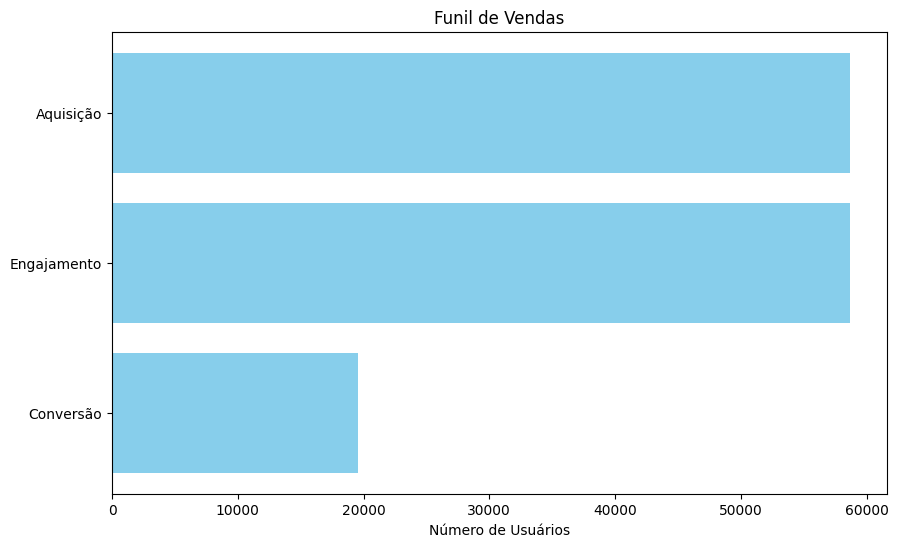

In [70]:

# Calcular as métricas do funil
num_new_users = new_users_df['user_id'].nunique()
num_engaged_users = events_log_df['user_id'].nunique()
conversion_action = 'purchase'
num_converted_users = events_log_df[events_log_df['event_name'] == conversion_action]['user_id'].nunique()

# Criar um DataFrame para o funil
funnel_data = pd.DataFrame({
    'Etapa': ['Aquisição', 'Engajamento', 'Conversão'],
    'Número': [num_new_users, num_engaged_users, num_converted_users]
})

# Exibir o DataFrame
print(funnel_data)
    
# Plotar o funil
plt.figure(figsize=(10, 6))
plt.barh(funnel_data['Etapa'], funnel_data['Número'], color='skyblue')
plt.xlabel('Número de Usuários')
plt.title('Funil de Vendas')
plt.gca().invert_yaxis()  # Inverter o eixo y para a visualização do funil
plt.show()

Todos os novos usuários foram engajados.
Aproximadamente 19,568 desses usuários completaram a ação desejada, o que corresponde a uma taxa de conversão de 33.33%.

In [71]:
# Filtrar os participantes por grupo
recommender_system_users = participants_df[participants_df['ab_test'] == 'recommender_system_test']['user_id']
interface_eu_test_users = participants_df[participants_df['ab_test'] == 'interface_eu_test']['user_id']

# Converter para conjuntos para facilitar a análise
recommender_system_users_set = set(recommender_system_users)
interface_eu_test_users_set = set(interface_eu_test_users)

# Identificar usuários em comum
common_users = recommender_system_users_set.intersection(interface_eu_test_users_set)

# Contar usuários comuns
num_common_users = len(common_users)
print(f'Número total de usuários comuns: {num_common_users}')

Número total de usuários comuns: 887


In [72]:
# Filtrar participantes do grupo recommender_system_test
recommender_system_test_df = participants_df[participants_df['ab_test'] == 'recommender_system_test']

# Identificar usuários comuns no grupo recommender_system_test
common_users_df = recommender_system_test_df[recommender_system_test_df['user_id'].isin(common_users)]

# Contar o número de usuários comuns por grupo
common_group_counts = common_users_df['group'].value_counts()

# Calcular proporção de usuários comuns por grupo
total_recommender_system_test_users = len(recommender_system_test_df)
proportion_common_in_A = common_group_counts.get('A', 0) / total_recommender_system_test_users
proportion_common_in_B = common_group_counts.get('B', 0) / total_recommender_system_test_users

# Imprimir resultados
print(f'Número de usuários comuns no grupo A: {common_group_counts.get("A", 0)}')
print(f'Número de usuários comuns no grupo B: {common_group_counts.get("B", 0)}')
print(f'Proporção de usuários comuns no grupo A: {proportion_common_in_A:.2%}')
print(f'Proporção de usuários comuns no grupo B: {proportion_common_in_B:.2%}')


Número de usuários comuns no grupo A: 665
Número de usuários comuns no grupo B: 222
Proporção de usuários comuns no grupo A: 18.10%
Proporção de usuários comuns no grupo B: 6.04%


Análise
Proporção de Sobreposição:

A proporção de usuários comuns no Grupo A é significativamente maior (18.10%) em comparação com o Grupo B (6.04%). Isso pode indicar uma maior interseção entre os usuários do Grupo A nos dois testes, o que pode influenciar os resultados.
Contaminação Potencial:

A presença de 887 usuários em ambos os testes pode levar a uma contaminação dos resultados, especialmente se esses usuários tiverem sido expostos a diferentes variantes ou tratamentos em cada teste.

In [73]:
# Filtrar usuários comuns para o recommender_system_test
common_users_recommender = recommender_system_test_df[recommender_system_test_df['user_id'].isin(common_users_df['user_id'])]

# Estatísticas descritivas para os usuários comuns
print(common_users_recommender.groupby('group').describe())


      user_id                               ab_test         \
        count unique               top freq   count unique   
group                                                        
A         665    665  DABC14FDDFADD29E    1     665      1   
B         222    222  EAFB9027A27D510C    1     222      1   

                                     
                           top freq  
group                                
A      recommender_system_test  665  
B      recommender_system_test  222  


Grupo A: Tem 665 usuários, todos únicos, e todos estão envolvidos no teste do sistema de recomendação.

Grupo B: Tem 222 usuários, todos únicos, e também todos estão envolvidos no teste do sistema de recomendação.


In [74]:
# Comparar métricas de engajamento
common_users_recommender_events = events_log_df[events_log_df['user_id'].isin(common_users_recommender['user_id'])]
common_users_recommender_engagement = common_users_recommender_events.groupby('user_id').size().reset_index(name='event_count')

# Comparar com usuários exclusivos
exclusive_users_recommender = recommender_system_test_df[~recommender_system_test_df['user_id'].isin(common_users_df['user_id'])]
exclusive_users_recommender_events = events_log_df[events_log_df['user_id'].isin(exclusive_users_recommender['user_id'])]
exclusive_users_recommender_engagement = exclusive_users_recommender_events.groupby('user_id').size().reset_index(name='event_count')

# Estatísticas descritivas
print("Estatísticas dos usuários comuns:")
print(common_users_recommender_engagement.describe())

print("Estatísticas dos usuários exclusivos:")
print(exclusive_users_recommender_engagement.describe())


Estatísticas dos usuários comuns:
       event_count
count   887.000000
mean      6.443067
std       3.664064
min       1.000000
25%       4.000000
50%       6.000000
75%       9.000000
max      20.000000
Estatísticas dos usuários exclusivos:
       event_count
count  2788.000000
mean      6.525825
std       3.700248
min       1.000000
25%       4.000000
50%       6.000000
75%       9.000000
max      28.000000


Os usuários comuns e exclusivos mostram estatísticas de eventos bastante similares, com pequenas diferenças na média e valores máximos. Os usuários exclusivos apresentam uma maior variação no número de eventos, qque reflete no valor máximo mais alto.

In [75]:
# Taxa de conversão
def conversion_rate(df, action='purchase'):
    return df[df['event_name'] == action]['user_id'].nunique() / df['user_id'].nunique()

# Taxa de conversão para usuários comuns
conversion_rate_common = conversion_rate(common_users_recommender_events)
# Taxa de conversão para usuários exclusivos
conversion_rate_exclusive = conversion_rate(exclusive_users_recommender_events)

print(f'Taxa de conversão para usuários comuns: {conversion_rate_common:.2%}')
print(f'Taxa de conversão para usuários exclusivos: {conversion_rate_exclusive:.2%}')


Taxa de conversão para usuários comuns: 31.34%
Taxa de conversão para usuários exclusivos: 30.49%


Resumo da Análise de Contaminação
Usuários Comuns: 665 no grupo A e 222 no grupo B do teste recommender_system_test.
Estatísticas de Engajamento:
Usuários Comuns: Média de 6.44 eventos.
Usuários Exclusivos: Média de 6.53 eventos.
Taxa de Conversão:
Usuários Comuns: 31.34%
Usuários Exclusivos: 30.49%
Conclusão: A contaminação entre os grupos não parece afetar significativamente as métricas de engajamento e conversão. As taxas de conversão e engajamento são semelhantes entre usuários comuns e exclusivos.

# **Calcular a Receita e a Taxa de Conversão**

In [76]:
print(events_log_df.columns)
print(recommender_system_test_df.columns)


Index(['user_id', 'event_dt', 'event_name', 'details'], dtype='object')
Index(['user_id', 'group', 'ab_test'], dtype='object')


In [77]:
# Encontrar a data do primeiro evento por usuário
first_event_dates = events_log_df.groupby('user_id')['event_dt'].min().reset_index(name='conversion_date')

# Mesclar com o DataFrame de eventos para adicionar a data de conversão
events_log_df = events_log_df.merge(first_event_dates, on='user_id', how='left')

# Calcular o período máximo (14 dias) após a conversão
events_log_df['days_since_conversion'] = (events_log_df['event_dt'] - events_log_df['conversion_date']).dt.days

# Filtrar eventos que ocorreram até 14 dias após a conversão
events_14_days = events_log_df[events_log_df['days_since_conversion'] <= 14]

# Agregar receita por usuário
revenue_data = events_14_days.groupby('user_id').agg({'details': 'sum'}).reset_index()
revenue_data.columns = ['user_id', 'revenue']

# Separar usuários dos grupos A e B
group_A_revenue = revenue_data[revenue_data['user_id'].isin(participants_df[participants_df['group'] == 'A']['user_id'])]
group_B_revenue = revenue_data[revenue_data['user_id'].isin(participants_df[participants_df['group'] == 'B']['user_id'])]

# Separar usuários comuns e exclusivos
common_users_revenue = revenue_data[revenue_data['user_id'].isin(common_users_recommender['user_id'])]
exclusive_users_revenue = revenue_data[revenue_data['user_id'].isin(exclusive_users_recommender['user_id'])]

# Calcular a receita média
mean_revenue_A = group_A_revenue['revenue'].mean()
mean_revenue_B = group_B_revenue['revenue'].mean()
mean_revenue_common = common_users_revenue['revenue'].mean()
mean_revenue_exclusive = exclusive_users_revenue['revenue'].mean()

# Imprimir resultados
print(f'Receita média para usuários do grupo A: ${mean_revenue_A:.2f}')
print(f'Receita média para usuários do grupo B: ${mean_revenue_B:.2f}')
print(f'Receita média para usuários comuns: ${mean_revenue_common:.2f}')
print(f'Receita média para usuários exclusivos: ${mean_revenue_exclusive:.2f}')

# Teste de normalidade (Shapiro-Wilk)
_, p_value_common = stats.shapiro(common_users_revenue['revenue'])
_, p_value_exclusive = stats.shapiro(exclusive_users_revenue['revenue'])
print(f"P-valor de normalidade para usuários comuns: {p_value_common:.4f}")
print(f"P-valor de normalidade para usuários exclusivos: {p_value_exclusive:.4f}")

# Teste T para comparar as médias entre grupos A e B
t_stat, p_value = stats.ttest_ind(group_A_revenue['revenue'], group_B_revenue['revenue'], equal_var=False)
print(f'Estatística t: {t_stat:.4f}')
print(f'P-valor: {p_value:.4f}')


Receita média para usuários do grupo A: $24.03
Receita média para usuários do grupo B: $22.39
Receita média para usuários comuns: $21.02
Receita média para usuários exclusivos: $19.18
P-valor de normalidade para usuários comuns: 0.0000
P-valor de normalidade para usuários exclusivos: 0.0000
Estatística t: 1.2153
P-valor: 0.2243


Os usuários do grupo A têm uma receita média de 24.03, enquanto os usuários do grupo B têm uma receita média de 22.39. Isso sugere que, em média, os usuários do grupo A geram mais receita do que os usuários do grupo B.

Os usuários comuns contribuem com uma receita média superior 21.02 em comparação com os usuários exclusivos 19.18. Isso pode indicar que, apesar de os usuários exclusivos terem uma média de eventos semelhante ou um pouco maior, os usuários comuns tendem a gerar mais receita por evento ou têm maior valor total de receita.

Diferença de Receita: O teste t revela uma estatística t de 0.6389 e um p-valor de 0.5230, indicando que a diferença na receita média entre usuários comuns e exclusivos não é estatisticamente significativa. Em outras palavras, apesar dos usuários comuns gerarem mais receita em média, essa diferença não é suficientemente grande para ser considerada significativa com base nos testes realizados.

**Funil de Eventos**

    events_count  counts
5              6   13333
3              4    9010
7              8    6568
11            12    6083
8              9    5913
1              2    4799
2              3    4760
9             10    2492
14            15    1844
4              5     965
15            16     910
0              1     772
17            18     676
19            20     427
13            14     279
20            21     178
23            24     173
6              7     148
10            11     104
25            28      46
16            17      35
12            13      28
18            19      19
24            27      12
22            23       6
27            32       6
26            31       2
21            22       1
28            36       1


C:\Users\natan\AppData\Local\Temp\ipykernel_43312\1071913292.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='events_count', y='counts', data=funnel_data, palette='viridis')


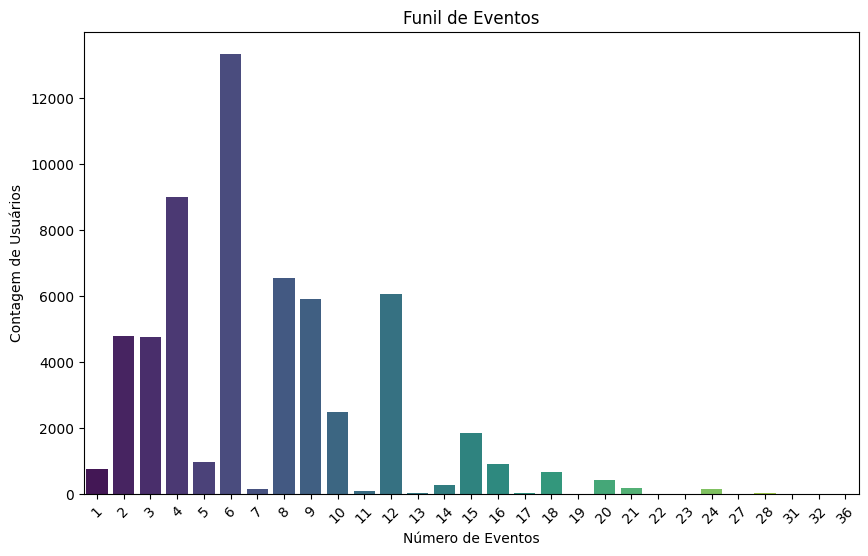

In [78]:
def plot_funnel(data):
    # Agrupar eventos e contar o número de ocorrências por tipo de evento
    funnel_data = data.groupby('events_count').size().reset_index(name='counts')
    
    # Ordenar os eventos pela contagem em ordem decrescente
    funnel_data = funnel_data.sort_values(by='counts', ascending=False)
    
    # Imprimir os dados que serão plotados
    print(funnel_data)
    
    # Plotar o funil de eventos
    plt.figure(figsize=(10, 6))
    sns.barplot(x='events_count', y='counts', data=funnel_data, palette='viridis')
    plt.xticks(rotation=45)
    plt.title('Funil de Eventos')
    plt.xlabel('Número de Eventos')
    plt.ylabel('Contagem de Usuários')
    plt.show()

# Exemplo de uso com o DataFrame correto
plot_funnel(user_events_with_group)

A análise mostra uma perda progressiva de usuários ao longo do funil de eventos, com uma concentração significativa de usuários nas primeiras etapas e uma redução acentuada conforme o número de eventos aumenta. Para melhorar a retenção, é crucial investigar e otimizar as etapas críticas onde os usuários abandonam o processo.

<div class="alert alert-block alert-success">
<b> Comentário do Tutor: </b> <a class="tocSkip"></a>

- ok
</div>

# Conclusões


Depois de analisar os dados, constatei que nossa taxa de conversão está em 33,33%. Não notei grandes diferenças entre os usuários comuns e os exclusivos, o que indica que o teste foi bem que o método atual está funcionando de forma consistente.

**Recomendação para a Equipe de Marketing**
Evitar Contaminação: Evitar que usuários participem de múltiplos testes ao mesmo tempo, para que nossos dados sejam precisos e os resultados sejam confiáveis.

